In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [43]:
base_dataset = pd.read_excel('AirQualityUCI.xlsx')
base_dataset

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.000000,150,11.881723,1045.500000,166.0,1056.250000,113.0,1692.000000,1267.500000,13.600000,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.250000,112,9.397165,954.750000,103.0,1173.750000,92.0,1558.750000,972.250000,13.300000,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.000000,88,8.997817,939.250000,131.0,1140.000000,114.0,1554.500000,1074.000000,11.900000,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.500000,80,9.228796,948.250000,172.0,1092.000000,122.0,1583.750000,1203.250000,11.000000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.250000,51,6.518224,835.500000,131.0,1205.000000,116.0,1490.000000,1110.000000,11.150000,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.000000,38,4.741012,750.250000,89.0,1336.500000,96.0,1393.000000,949.250000,11.175000,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.000000,31,3.624399,689.500000,62.0,1461.750000,77.0,1332.750000,732.500000,11.325000,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.250000,31,3.326677,672.000000,62.0,1453.250000,76.0,1332.750000,729.500000,10.675000,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.000000,24,2.339416,608.500000,45.0,1579.000000,60.0,1276.000000,619.500000,10.650000,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.750000,19,1.696658,560.750000,-200.0,1705.000000,-200.0,1234.750000,501.250000,10.250000,60.200001,0.751657


In [44]:
#数据预处理
#缺失值处理
pro_dataset = base_dataset[base_dataset>0].dropna()
pro_dataset.shape

(827, 15)

In [45]:
y1 = pro_dataset['CO(GT)']
x1 = pro_dataset[['PT08.S1(CO)','AH','PT08.S5(O3)','PT08.S4(NO2)','PT08.S3(NOx)']]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=36)
LR = LinearRegression().fit(x1_train, y1_train)

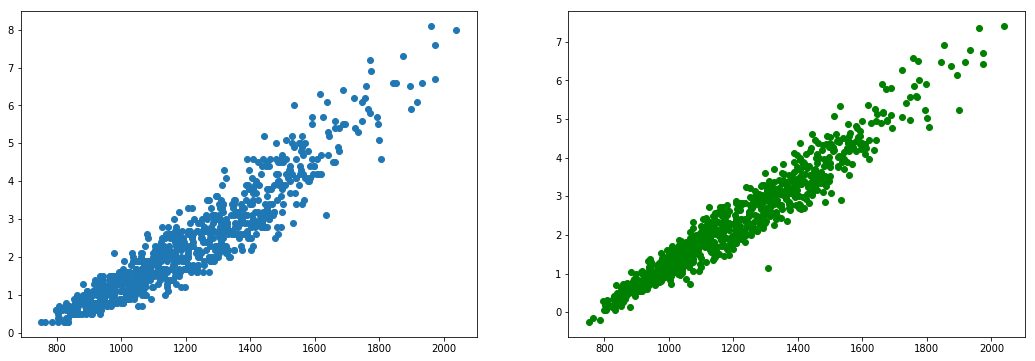

In [46]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.scatter(x1['PT08.S1(CO)'], y1)
plt.subplot(122)
plt.scatter(x1['PT08.S1(CO)'], LR.predict(x1),c='g')
# plt.plot(x1['PT08.S1(CO)'], LR.predict(x1))

In [47]:
s_train = LR.score(x1_train, y1_train)
s_test = LR.score(x1_test,y1_test)

print("多种气体观测值预测：")
print (LR.__class__.__name__ + " 对CO(GT)预测 " + ":")
print ("训练集的准确率为: {:.4f}".format(LR.score(x1_train, y1_train)))
print ("测试集的准确率为: {:.4f}".format(LR.score(x1_test, y1_test)))

多种气体观测值预测：
LinearRegression 对CO(GT)预测 :
训练集的准确率为: 0.9368
测试集的准确率为: 0.9517


In [48]:
y2 = pro_dataset['NOx(GT)']
x1 = pro_dataset[['PT08.S1(CO)','AH','PT08.S5(O3)','PT08.S4(NO2)','PT08.S3(NOx)']]
x2_train, x2_test, y2_train, y2_test = train_test_split(x1, y2, test_size=0.2, random_state=36)

LR = LinearRegression().fit(x2_train, y2_train)

s_train = LR.score(x2_train, y2_train)
s_test = LR.score(x2_test,y2_test)

print (LR.__class__.__name__ +  " 对NOx(GT)预测 "  + ":")
print ("训练集的准确率为: {:.4f}".format(LR.score(x2_train, y2_train)))
print ("测试集的准确率为: {:.4f}".format(LR.score(x2_test, y2_test)))

LinearRegression 对NOx(GT)预测 :
训练集的准确率为: 0.9056
测试集的准确率为: 0.9069


In [49]:
y1 = pro_dataset['CO(GT)']
x1 = pro_dataset[['PT08.S1(CO)']]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=36)
LR = LinearRegression().fit(x1_train, y1_train)
s_train = LR.score(x1_train, y1_train)
s_test = LR.score(x1_test,y1_test)

print("一种气体观测值预测：")
print (LR.__class__.__name__ + " 对CO(GT)预测 " + ":")
print ("训练集的准确率为: {:.4f}".format(LR.score(x1_train, y1_train)))
print ("测试集的准确率为: {:.4f}".format(LR.score(x1_test, y1_test)))

一种气体观测值预测：
LinearRegression 对CO(GT)预测 :
训练集的准确率为: 0.8747
测试集的准确率为: 0.8810
